<a href="https://colab.research.google.com/github/gilbh/Applied_Digital_Research_in_SA_Langs/blob/main/Sanskrit_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we upload the required files and tell the Notebook their locations ("paths"):

Welcome!

In this notebook, we will practice:  

1) Performing OCR with Tesseract using Python code. The OCR is performed on an image file (showing a Sanskrit text) that you will upload.  

2) Calculating the character error rates (cer) between the above Tesseract-produced text and three other pre-prepared digitizations of the same Sanskrit text (which you will upload as .txt files): manually-typed, Transkribus, and Google Vision.


In [ ]:
# Here we provide information about the files we will use in this notebook:
# First, enter the  filename of the Sanskrit image you uploaded ("Files" icon on the left bar)
# It should end with '.png' '.jpg' or 'jpeg':
img_filename = '/content/Sitar scan Laghuyogavasistha.png'
# Likewise, enter below the three filenames of three text files you uploaded: manually-typed, Transkribus, and Google Vision
# (leave empty if you did not upload):
# ** add here variables for three files: manual_filename, trkbs_filename, google_vision_filename**
manual_filename = '/content/Sitar manually typed Laghuyogavasistha.txt'
tkbs_filename = ''
google_vision_filename = ''

Next, we run all the installations required for processing OCR and related tasks.

In [ ]:
# Install pytesseract and training data in your Google Colab environment
# The exclamation runs the command as a terminal command
!pip install tesseract
!pip install pytesseract
!apt-get install libtesseract-dev
!apt-get install tesseract-ocr
# Install jiwer to check WER and CER
!pip install jiwer
from jiwer import wer, cer, mer, wil
# Install Tesseract trained data for Sanskrit OCR
!wget https://github.com/tesseract-ocr/tessdata/raw/main/san.traineddata
!mv san.traineddata /usr/share/tesseract-ocr/4.00/tessdata/san.traineddata
# Install Sanscript module for converting scripts (from Devanagari to IAST)
!pip install indic_transliteration
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
--2024-06-12 11:29:12--  https://github.com/tesseract-ocr/tessdata/raw/main/san.traineddata
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/san.traineddata [following]
--2024-06-12 11:29:12--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/san.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 

Now, we load and display the image file:

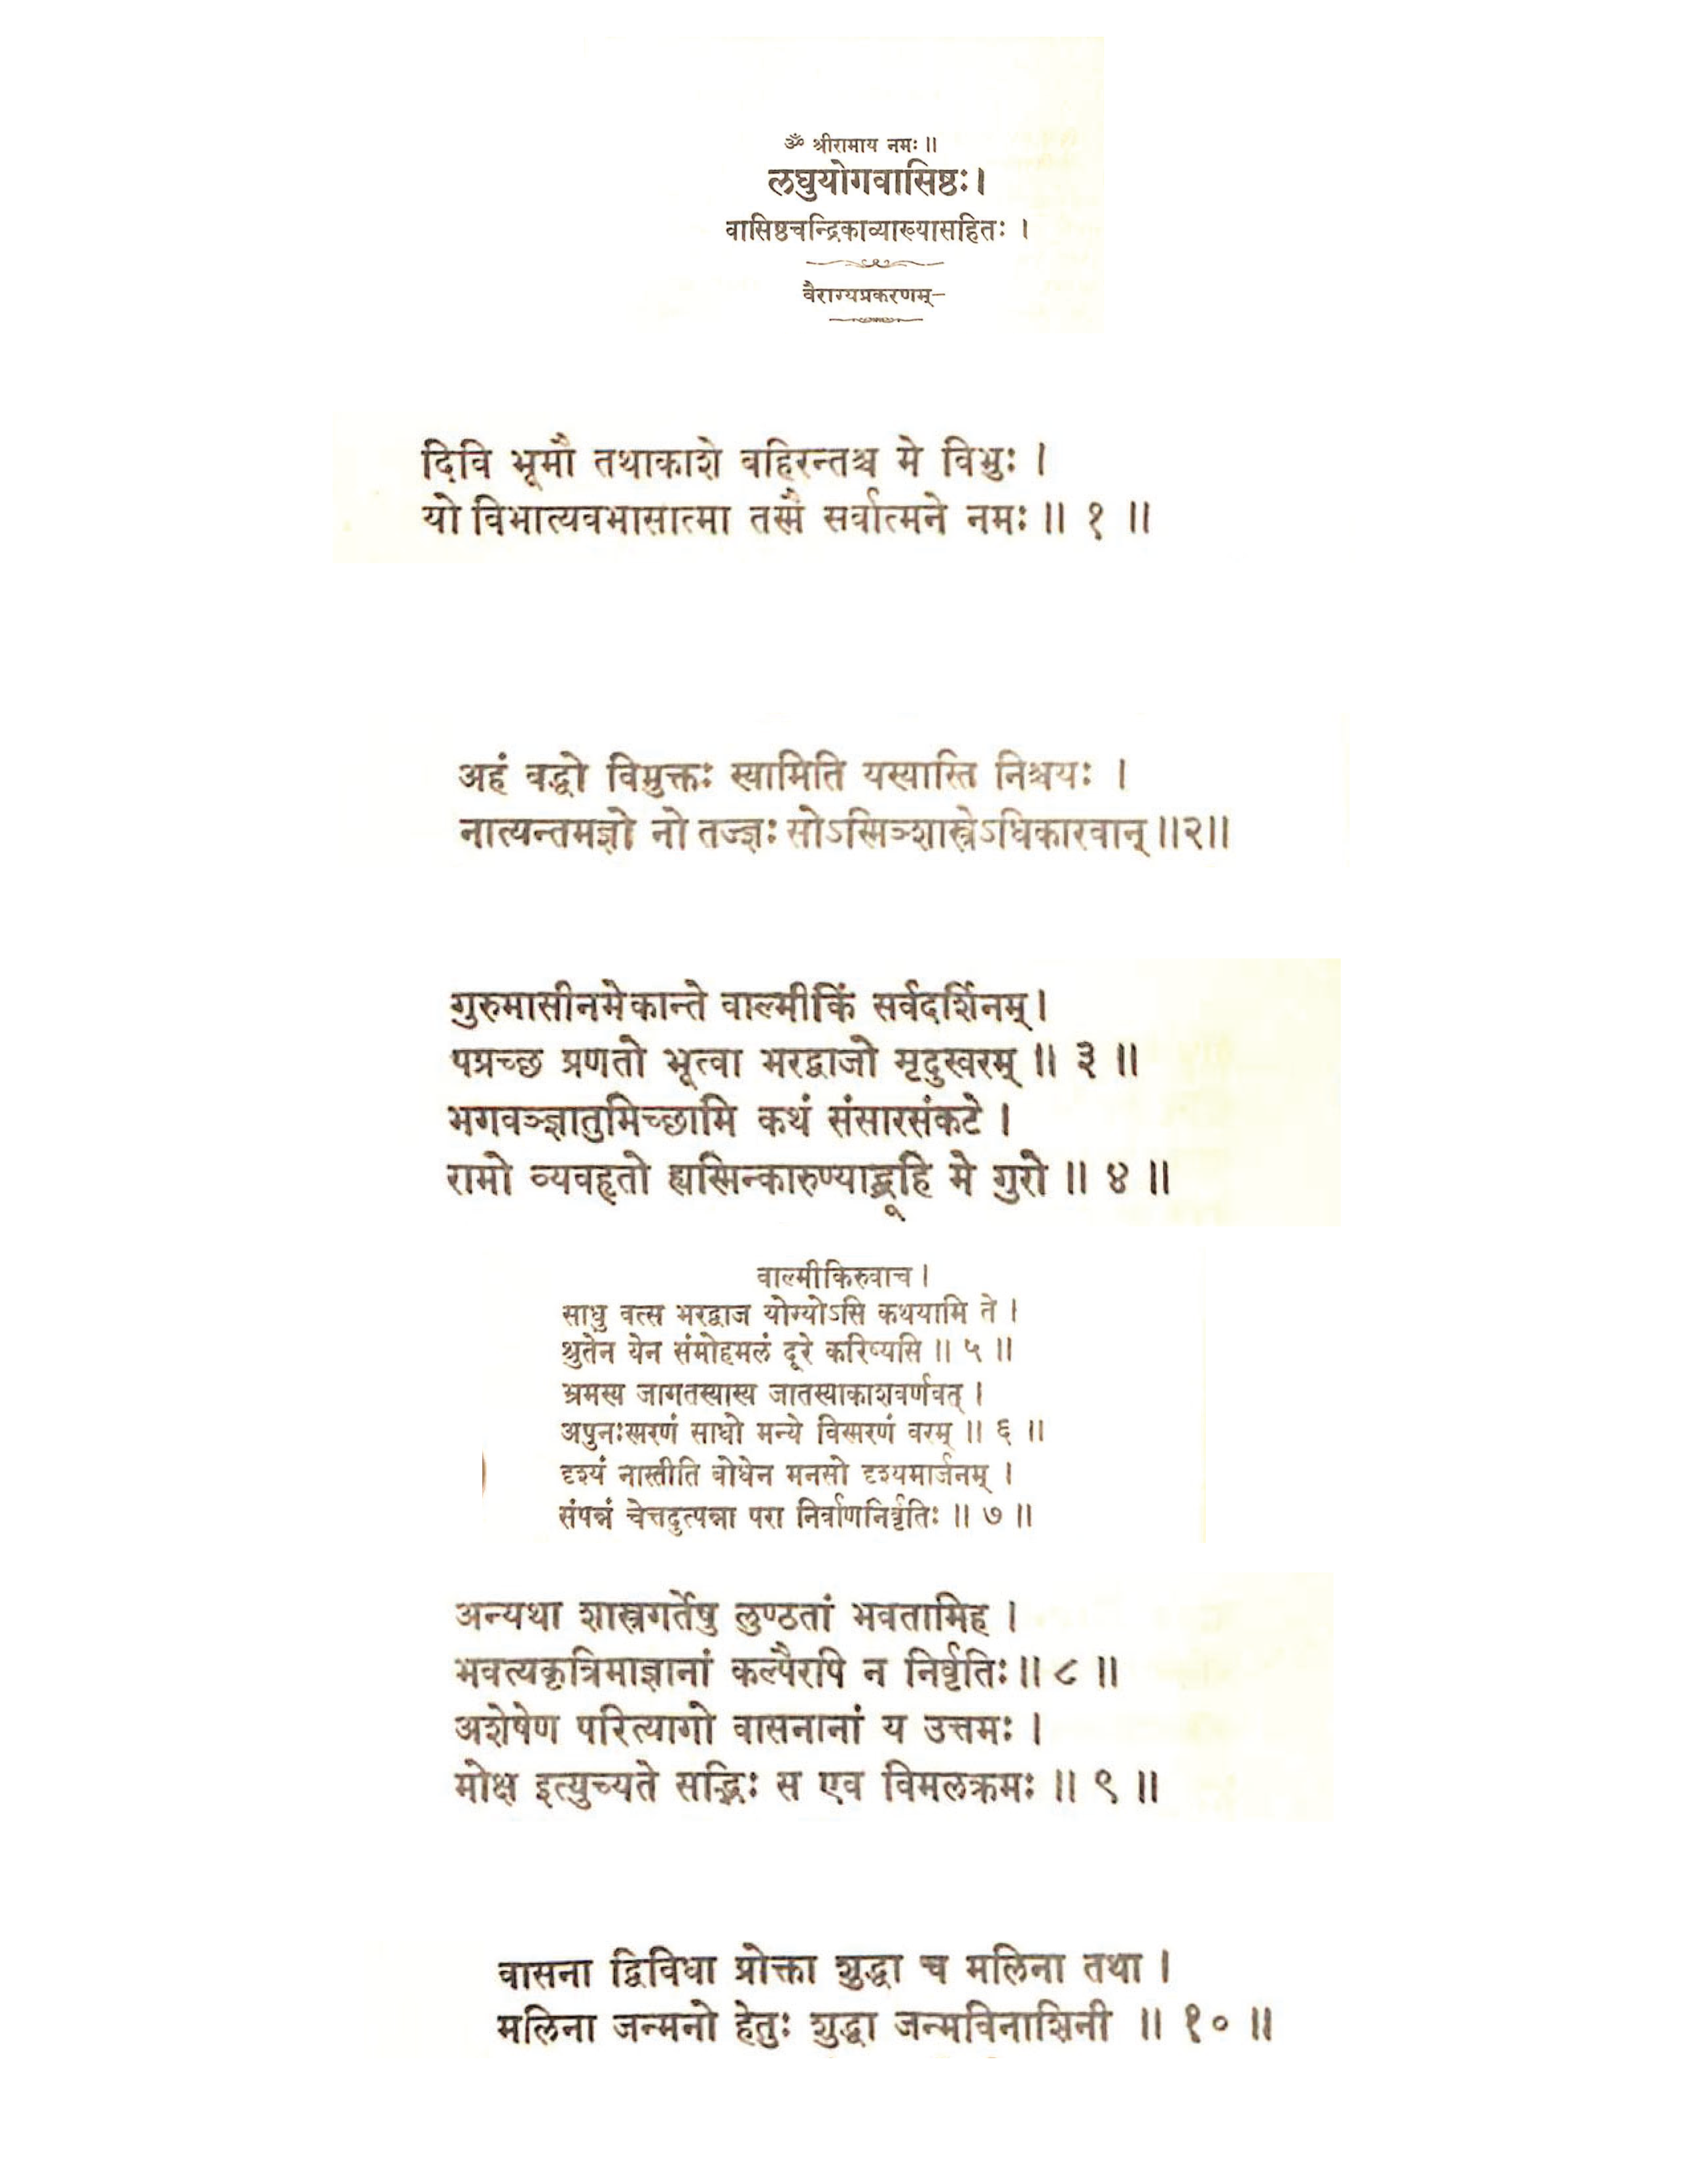

In [ ]:
# Import the Image module from the Pillow Library, which will help us access the image.
from PIL import Image
from IPython.display import display
# Open an image file
img = Image.open(img_filename)

# Display the image
display(img)

Perform OCR on this image and display the results:

In [ ]:
from PIL import Image

# Import the pytesseract library, which will run the OCR process.
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'/usr/local/lib/python3.10/dist-packages/tesseract/'
# Open a specific image file, convert the text in the image to computer-readable text (OCR),
# and then print the results for us to see here.
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
ocr_text_devanagari = pytesseract.image_to_string(Image.open(img_filename), lang="san")
print(ocr_text_devanagari)
# **add here devanagari to iast using sanscript**

ॐ भीरामाय नमः। ।
छघुयोगवासिष्ठः।
वासिष्ठचन्द्रिकाव्यास्यासहितः ।

(र ==. 2. ८.2. 2, ^= -~-~

वैराग्यप्रकरणम्‌-

दिवि भूमो तथाकादो वदिरन्तत्र्‌ मे विथुः।
यो विभात्यवभासात्मा तसं सवोत्मने नमः ॥ १ ॥

अहं बद्धो विग्रक्तः स्यामिति यस्यास्ति निश्रयः |
नात्यन्तमन्ञो नो तज्ज्ञः सोऽसिञ्जाच्रेऽधिक्रारवान्‌ ।२॥

गुरुमासीनमे कान्ते वाल्मीकिं सर्वदर्धिनम्‌।

पप्रच्छ प्रणतो भूत्वा मरद्वाजो मृदुखरम्‌ ॥ ३ ॥
भगवज्ज्ञातुमिच्छामि कथं संसारसंकटे ।

रामो व्यवहृतो छसिन्कारुणयाद्रूहि मे शुरो ॥ ४ ॥

वामी किरुवाच ।
साघु वत्स भरद्वाज योग्योऽपि कथयामि ते |
श्रुतेन येन संमोहमलं दृरे करिष्यसि ।॥ ५ ॥
भ्रमसख जागतस्याख जातस्याकाश्चवणंवत्‌ ।
अपुनःखरणं साधो मन्ये विसरणं वरम्‌ | ६ ॥
| दृश्यं नास्तीति बोधेन मनसो दऽयमा्जनम्‌ ।
संपन्नं चेत्तुत्यनना परा निर्वाणनिदरतिः ॥ ७ ॥

अन्यथा शाञ्लगर्तेषु द्ण्ठतां भवतामिह ।

भवत्य त्रिमाज्ञानां कल्येरपि न नितिः। < ॥
अरोषेण परित्यागो वासनानां य उत्तमः ।

मोक्ष इत्युच्यते सद्धिः स एव विमलक्रमः । ९ ॥

वासना द्विविधा प्रोक्ता छद्धा च मलिना तथा ।
मिना जन्मनो हेतुः शद्धा जन्मविनाञ्चिनी ॥ १०

Convert the script from Devanagari to IAST transliteration:

In [ ]:
ocr_text = transliterate(ocr_text_devanagari, sanscript.DEVANAGARI, sanscript.KOLKATA)
print(ocr_text)


ōṃ bhīrāmāya namaḥ| |
chaghuyōgavāsiṣṭhaḥ|
vāsiṣṭhacandrikāvyāsyāsahitaḥ |

(ra ==. 2. 8.2. 2, ^= -~-~

vairāgyaprakaraṇam‌-

divi bhūmō tathākādō vadirantatr‌ mē vithuḥ|
yō vibhātyavabhāsātmā tasaṃ savōtmanē namaḥ || 1 ||

ahaṃ baddhō vigraktaḥ syāmiti yasyāsti niśrayaḥ |
nātyantamanñō nō tajjñaḥ sō'siñjācrē'dhikrāravān‌ |2||

gurumāsīnamē kāntē vālmīkiṃ sarvadardhinam‌|

papraccha praṇatō bhūtvā maradvājō mṛdukharam‌ || 3 ||
bhagavajjñātumicchāmi kathaṃ saṃsārasaṃkaṭē |

rāmō vyavahṛtō chasinkāruṇayādrūhi mē śurō || 4 ||

vāmī kiruvāca |
sāghu vatsa bharadvāja yōgyō'pi kathayāmi tē |
śrutēna yēna saṃmōhamalaṃ dṛrē kariṣyasi ||| 5 ||
bhramasakha jāgatasyākha jātasyākāścavaṇaṃvat‌ |
apunaḥkharaṇaṃ sādhō manyē visaraṇaṃ varam‌ | 6 ||
| dṛśyaṃ nāstīti bōdhēna manasō da'yamājanam‌ |
saṃpannaṃ cēttutyananā parā nirvāṇanidaratiḥ || 7 ||

anyathā śāñlagartēṣu dṇṭhatāṃ bhavatāmiha |

bhavatya trimājñānāṃ kalyērapi na nitiḥ| < ||
arōṣēṇa parityāgō vāsanānāṃ ya uttamaḥ |

mōkṣa ityucyatē saddhi

Load the three pre-prepared text files:

In [ ]:
# Read the text from a .txt file and return it as a variable:
def load_text_file(filename):
  if filename != '':
    with open(filename, "r", encoding="utf-8") as file:
      text = file.read()
    print(filename + " loaded successfully")
  else:
    text = ""
  return text


manual_text = load_text_file(manual_filename)
tkbs_text = load_text_file(tkbs_filename)
google_vision_text = load_text_file(google_vision_filename)


/content/Sitar manually typed Laghuyogavasistha.txt loaded successfully


Now, having the four different text versions in hand (Tesseract, manually-typed, Transkribus, and Google Vision) we can run CER comparisons between the manually-typed and the other three files.

In [ ]:
def calculate_cer(compared_text, caption):
  if compared_text != '':
    character_error_rate = cer(manual_text, compared_text)
    print("cer for " + caption + ": " + f"{character_error_rate * 100:.2f}%")

# not used: wer (word_error_rate), mer (match_error_rate), wil (word_info_rate)

calculate_cer(ocr_text, 'Tesseract')
calculate_cer(tkbs_text, 'Transkribus')
calculate_cer(google_vision_text, 'Google Vision')



cer for Tesseract: 0.00%
